In [108]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as d

<h1><center>BUSINESS PROBLEM 1 - Lending Club Loans

In [109]:
df1=pd.read_csv('LoansData.csv')

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [111]:
df1.columns=[col.replace('.','_') for col in df1.columns]

In [112]:
df1.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [114]:
df1.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [115]:
def handling_missing_values(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x=x.fillna(x.median())
    elif ((x.dtype=='object') or (x.dtype=='o')):
        x=x.fillna(x.mode()[0])
    else:
        x
    return x

In [116]:
df1=df1.apply(handling_missing_values)

In [117]:
df1.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

<AxesSubplot:>

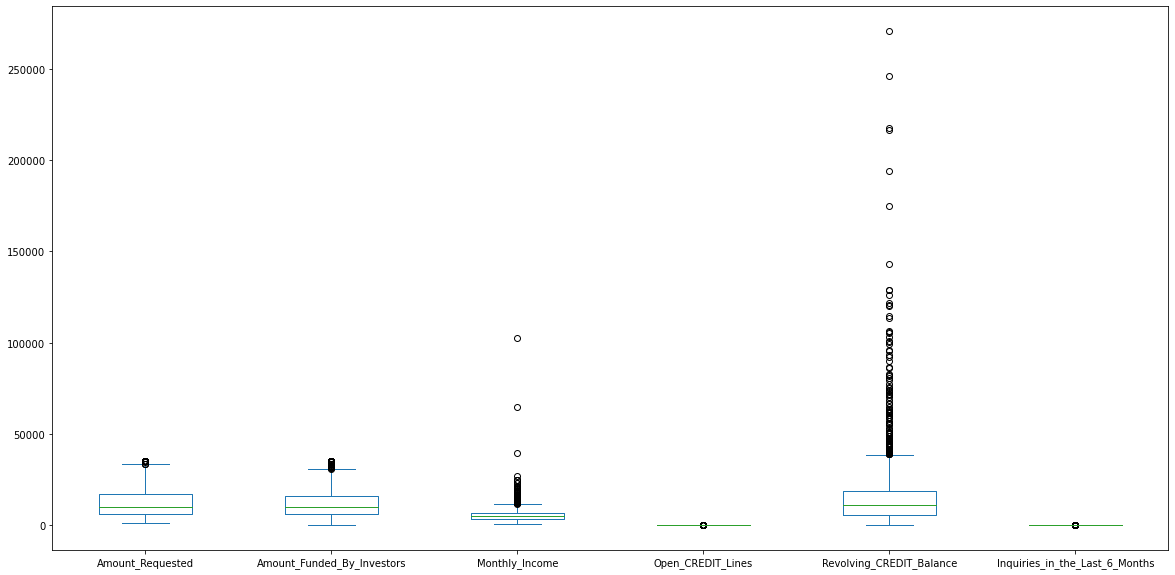

In [118]:
df1.plot(kind='box',figsize=(20,10))

In [119]:
df1.Amount_Requested.min()

1000.0

In [120]:
df1.Amount_Requested.quantile(0.01)

1500.0

In [121]:
df1.Amount_Requested.max()

35000.0

In [122]:
df1.Amount_Requested.quantile(0.99)

35000.0

In [123]:
def handling_outlier(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    else:
        x
    return x

In [124]:
df1=df1.apply(handling_outlier)

<AxesSubplot:>

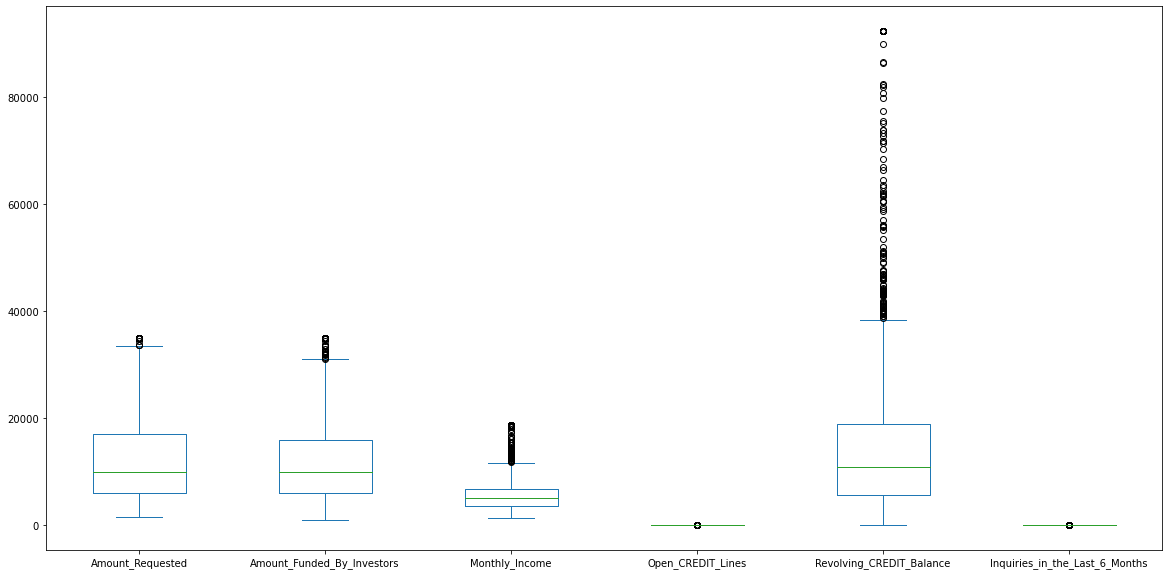

In [125]:
df1.plot(kind='box',figsize=(20,10))

In [126]:
df1.Amount_Requested.min()

1500.0

In [127]:
df1.Amount_Requested.max()

35000.0

In [128]:
df1['Interest_Rate']=df1.Interest_Rate.apply(lambda x: float(str(x).replace('%','')))

In [129]:
df1['Debt_To_Income_Ratio']=df1.Debt_To_Income_Ratio.apply(lambda x: float(str(x).replace('%','')))

In [130]:
df1['Loan_Length']=df1.Loan_Length.apply(lambda x: float(str(x).replace(' months','')))

In [131]:
df1['Employment_Length']=df1.Employment_Length.apply(lambda x: float(str(x).replace(' years','').replace(' year','').replace('< ','').replace('+','')))

In [132]:
df1['FICO_Avg']=(pd.to_numeric(df1.FICO_Range.str.split('-',expand=True)[0])+pd.to_numeric(df1.FICO_Range.str.split('-',expand=True)[1]))/2

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   float64
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2500 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   FICO_Range                      2500 non-null   object 
 10  Open_CREDIT_Lines               2500 non-null   float64
 11  Revolving_CREDIT_Balance        2500 non-null   float64
 12  Inquiries_in_the_Last_6_Months  25

In [134]:
df1.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
0,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0


In [135]:
df1=df1.drop(['Amount_Requested','State'],axis=1)

In [136]:
df1.head()

,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,9975.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0


df2=pd.get_dummies(df1, columns=['Loan_Purpose','Home_Ownership'],drop_first=True)

In [137]:
df2=df1
df2.head()

,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,9975.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0


<h3>BUSINESS PROBLEM-1A: </h3> <br>Intrest rate is varied for different loan amounts (Less intrest charged for high loan
amounts)

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

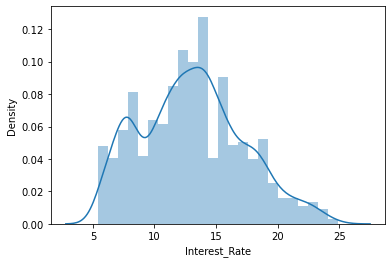

In [138]:
sns.distplot(df2.Interest_Rate)

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount_Funded_By_Investors', ylabel='Density'>

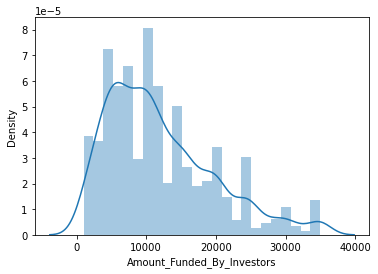

In [139]:
sns.distplot(df2.Amount_Funded_By_Investors)

In [140]:
df2.Amount_Funded_By_Investors.corr(df2.Interest_Rate)

0.33744350858158223

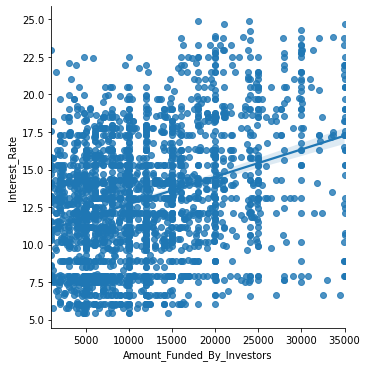

In [141]:
sns.lmplot(x = 'Amount_Funded_By_Investors',y = "Interest_Rate",data=df2)
plt.show()

<center> <i> Since coefficient of correlation between Amount Funded By Investors and Interest Rate is positive and pvalue is very low, we can't reject null hypothesis and conclude that interest rate is positively correlated to Loan amount

<h3>BUSINESS PROBLEM-1B: </h3> <br>Loan length is directly effecting intrest rate.

<center>H0: Loan Length is directly effecting interest rate <br>
H1: Loan Length is not effecting interest rate

In [142]:
df2.Interest_Rate.corr(df2.Loan_Length)

0.42425921833327274

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


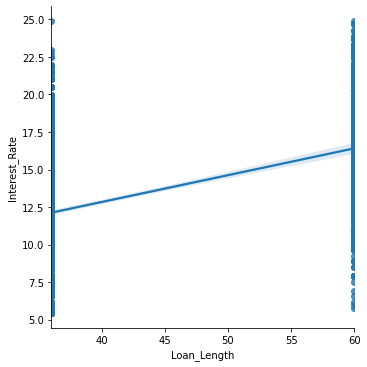

In [143]:
sns.lmplot('Loan_Length','Interest_Rate',data=df2)
plt.show()

<center> The relationship between Loan Length and Interest Rate is positive, hence H0 can be accepted. <br>
    <i>Therefore, Loan Length has a direct effect to the Interest Rate

<h3>BUSINESS PROBLEM-1C: </h3> <br>Interest rate varies for different purpose of loans

<center>H0: Interest rate has no variation for different Loan Purpose <br>
H1: Interest rate has variation for different Loan Purpose

In [144]:
df2.columns

Index(['Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Length',
       'Loan_Purpose', 'Debt_To_Income_Ratio', 'Home_Ownership',
       'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length', 'FICO_Avg'],
      dtype='object')

In [145]:
df2.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [146]:
debt_consolidation=df2['Interest_Rate'][df2["Loan_Purpose"]=='debt_consolidation']
credit_card=df2['Interest_Rate'][df2["Loan_Purpose"]=='credit_card']
other=df2['Interest_Rate'][df2["Loan_Purpose"]=='other']
moving=df2['Interest_Rate'][df2["Loan_Purpose"]=='moving']
car=df2['Interest_Rate'][df2["Loan_Purpose"]=='car']
vacation=df2['Interest_Rate'][df2["Loan_Purpose"]=='vacation']
home_improvement=df2['Interest_Rate'][df2["Loan_Purpose"]=='home_improvement']
house=df2['Interest_Rate'][df2["Loan_Purpose"]=='house']
major_purchase=df2['Interest_Rate'][df2["Loan_Purpose"]=='major_purchase']
educational=df2['Interest_Rate'][df2["Loan_Purpose"]=='educational']
medical=df2['Interest_Rate'][df2["Loan_Purpose"]=='medical']
wedding=df2['Interest_Rate'][df2["Loan_Purpose"]=='wedding']
small_business=df2['Interest_Rate'][df2["Loan_Purpose"]=='small_business']
renewable_energy=df2['Interest_Rate'][df2["Loan_Purpose"]=='renewable_energy']

In [147]:
stats.f_oneway(debt_consolidation,credit_card,other,moving,car,vacation,home_improvement,house,major_purchase,educational,medical,wedding,small_business,renewable_energy)

F_onewayResult(statistic=7.491453851847694, pvalue=1.1044428447897775e-14)

<center>pvalue of 1.10e-14 is lesser than 0.05, hence we reject Null Hypothesis. <br>
    <i>Therefore, Interest Rate vary for diferrent loan lenght

<h3>BUSINESS PROBLEM-1D: </h3> <br>Relationship between FICO scores and Home Ownership

<center>H0: There is no Relationship between FICO scores and Home Ownership <br>
H1: There is a Relationship between FICO scores and Home Ownership

In [148]:
FICO_HO_CrossTab=pd.crosstab(df2.FICO_Range,df2.Home_Ownership,margins=True)

In [149]:
Chi_Squ_FICO_HO=stats.chi2_contingency(FICO_HO_CrossTab)

In [150]:
Chi_Squ_FICO_HO

(473.5648028168521,
 3.4427118118036043e-26,
 190,
 array([[2.29600e+00, 2.00000e-03, 1.00000e-02, 4.00000e-01, 2.29200e+00,
         5.00000e+00],
        [1.37760e+00, 1.20000e-03, 6.00000e-03, 2.40000e-01, 1.37520e+00,
         3.00000e+00],
        [4.59200e-01, 4.00000e-04, 2.00000e-03, 8.00000e-02, 4.58400e-01,
         1.00000e+00],
        [1.83680e+00, 1.60000e-03, 8.00000e-03, 3.20000e-01, 1.83360e+00,
         4.00000e+00],
        [5.74000e+01, 5.00000e-02, 2.50000e-01, 1.00000e+01, 5.73000e+01,
         1.25000e+02],
        [6.65840e+01, 5.80000e-02, 2.90000e-01, 1.16000e+01, 6.64680e+01,
         1.45000e+02],
        [7.94416e+01, 6.92000e-02, 3.46000e-01, 1.38400e+01, 7.93032e+01,
         1.73000e+02],
        [7.62272e+01, 6.64000e-02, 3.32000e-01, 1.32800e+01, 7.60944e+01,
         1.66000e+02],
        [7.20944e+01, 6.28000e-02, 3.14000e-01, 1.25600e+01, 7.19688e+01,
         1.57000e+02],
        [6.24512e+01, 5.44000e-02, 2.72000e-01, 1.08800e+01, 6.23424e+01,
  

<center>pvalue of 3.442e-26 is lesser than 0.05, hence we reject Null Hypothesis. <br>
    <i>Therefore, there is a Relationship between FICO scores and Home Ownership

<h1><center>Business Problem 2 - Price Quotes

<b>To assess if there is any difference in the average price quotes provided by Mary and Barry.

In [151]:
df3=pd.read_csv('Price_Quotes.csv')
df3

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


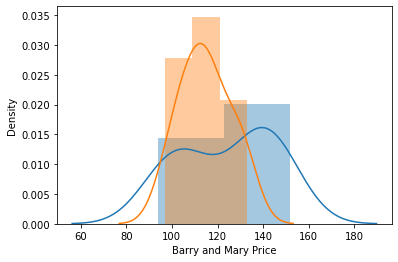

In [152]:
sns.distplot(df3.Barry_Price)
sns.distplot(df3.Mary_Price)
plt.xlabel("Barry and Mary Price")
plt.show()

<center>H0: There is no difference between Barry's and Mary's average price quotes. <br>
H1: There is difference between Barry's and Mary's average price quotes.

In [153]:
stats.ttest_rel(df3.Barry_Price,df3.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

<center>pvalue of 0.028 is lesser than 0.05, hence we reject Null Hypothesis. <br>
    <i>Therefore, there is difference between Barry's and Mary's average price quotes.

<H1><center> Business Problem 3: The New Life Residential Treatment Facility 

In [154]:
df4=pd.read_csv("Treatment_Facility.csv")
df4=df4.rename(columns={'VAR4':'TRFF','VAR5':'CI'})
df4

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


<b>To determine if the reengineering effort changed the critical incidence rate

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


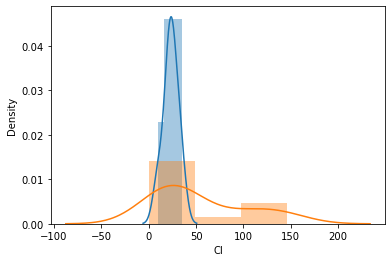

In [155]:
sns.distplot(df4['CI'].loc[df4.Reengineer=='Post'])
sns.distplot(df4['CI'].loc[df4.Reengineer=='Prior'])
plt.show()

In [156]:
df4.shape

(20, 5)

<center>H0: The critical incident rate has improved. <br>
H1: The critical incident rate has not improved.

In [157]:
stats.ttest_ind(df4['CI'].loc[df4.Reengineer=='Prior'],df4['CI'].loc[df4.Reengineer=='Post'])

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

<center>pvalue of 0.12 is greater than 0.05, hence we reject Null Hypothesis. <br>
    <i>Therefore, the critical incident rate has not improved.

<h1><center>Business Problem 4: ApDudes

In [158]:
df5=pd.read_csv('Priority_Assessment.csv')
df5

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [159]:
df5["Priority"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

<b>Classification and Prioritization system would speed the completion of jobs on priority basis.

<center>H0: The Classification and Prioritization system has no impact on the completion of jobs on priority basis. <br>
    H1: The Classification and Prioritization system has an impact on the completion of jobs on priority basis

In [160]:
stats.f_oneway(
    df5['Days'].loc[df5.Priority=='High'],
    df5['Days'].loc[df5.Priority=='Medium'],
    df5['Days'].loc[df5.Priority=='Low']
)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

<center> pvalue of 0.1611 is greater than 0.05, hence we reject null hypothesis.<br>
    <i>Therefore, the Classification and Prioritization system has an impact on the completion of jobs on priority basis

<h1><center>Business Problem 5: The Red Rocks Amphitheatre 

In [161]:
df6=pd.read_csv('Films.csv')
df6

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [162]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [163]:
df6['Marital_Status']=df6['Marital_Status'].apply(lambda x: 1 if x=='Married'else x)
df6['Marital_Status']=df6['Marital_Status'].apply(lambda x: 2 if x=='Single' else x)
df6['Marital_Status']=df6['Marital_Status'].apply(lambda x: 2 if x=='Slngle'else x)

In [164]:
df6['Marital_Status']=pd.to_numeric(df6['Marital_Status'])

In [165]:
# df6.Marital_Status.unique()

In [166]:
df6.Gender.unique()

array(['Female', 'Male', '2', '1'], dtype=object)

In [167]:
df6['Gender']=df6['Gender'].apply(lambda x: 'Male' if x=='1' else x)
df6['Gender']=df6['Gender'].apply(lambda x: 'Female' if x=='2' else x)

In [168]:
df6.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [60]:
# df6['Gender']=pd.to_numeric(df6['Gender'])

In [61]:
# df6['Movie']=df6['Movie'].astype(dtype='str')
# df6['Marital_Status']=df6['Marital_Status'].astype(dtype='str')
# df6['Sinage']=df6['Sinage'].astype(dtype='str')
# df6['Clean']=df6['Clean'].astype(dtype='str')
# df6['Parking']=df6['Parking'].astype(dtype='str')
# df6['Overall']=df6['Overall'].astype(dtype='str')
# df6['Age']=df6['Age'].astype(dtype='str')
# df6['Hear_About']=df6['Hear_About'].astype(dtype='str')

In [62]:
# df6['Movie']=df6['Movie'].fillna(df6['Movie'].mode())
# df6['Marital_Status']=df6['Marital_Status'].fillna(df6['Marital_Status'].mode())
# df6['Sinage']=df6['Sinage'].fillna('2.0')
# df6['Sinage']=df6['Sinage'].fillna(df6['Sinage'].mode())
# df6['Clean']=df6['Clean'].fillna(df6['Clean'].mode())
# df6['Parking']=df6['Parking'].fillna(df6['Parking'].mode())
# df6['Overall']=df6['Overall'].fillna(df6['Overall'].mode())
# df6['Age']=df6['Age'].fillna(df6['Age'].mode())
# df6['Income']=df6['Income'].fillna(df6['Income'].mean())
# df6['Hear_About']=df6['Hear_About'].fillna(df6['Hear_About'].mode)

In [63]:
df6['Income']=df6['Income'].fillna(df6['Income'].mean())

C:\Users\VVLG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

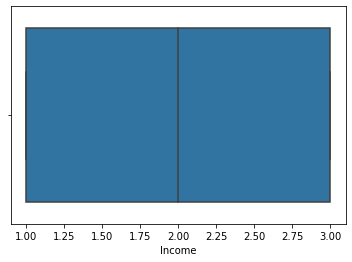

In [64]:
sns.boxplot(df6.Income)

<h4>5a: What is the overall level of customer satisfaction?

In [65]:
df6.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

<center>H0: The customers are satisfied<br>
    H1: The customers are not satisfied

In [66]:
Cust_Satis=pd.crosstab(df6.Movie,df6.Overall,margins=True)
Cust_Satis

Overall,1.0,2.0,3.0,4.0,5.0,All
Movie,,,,,,
Ferris Buellers Day Off,59,71,4,1,2,137
Old School,21,10,0,0,1,32
Willy Wonka,71,79,8,0,1,159
All,151,160,12,1,4,328


In [67]:
Chi2_CustSatis=stats.chi2_contingency(Cust_Satis)
Chi2_CustSatis

(10.359658219839295,
 0.7965274318750787,
 15,
 array([[6.30701220e+01, 6.68292683e+01, 5.01219512e+00, 4.17682927e-01,
         1.67073171e+00, 1.37000000e+02],
        [1.47317073e+01, 1.56097561e+01, 1.17073171e+00, 9.75609756e-02,
         3.90243902e-01, 3.20000000e+01],
        [7.31981707e+01, 7.75609756e+01, 5.81707317e+00, 4.84756098e-01,
         1.93902439e+00, 1.59000000e+02],
        [1.51000000e+02, 1.60000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.28000000e+02]]))

<center>Since pvalue > 0.05 we accept null hypothesis.<br>
    The customers are satisfied with the movies.

<h4>5b. What factors are linked to satisfaction?

In [68]:
df6.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [77]:
Sin_Over=pd.crosstab(df6.Sinage,df6.Overall, margins=True)
Sin_Over

Overall,1.0,2.0,3.0,4.0,5.0,All
Sinage,,,,,,
1.0,90,22,0,0,1,113
2.0,43,107,4,0,1,155
3.0,13,25,8,1,1,48
4.0,2,4,0,0,0,6
5.0,2,2,0,0,1,5
All,150,160,12,1,4,327


In [78]:
stats.chi2_contingency(Sin_Over)

(124.81695331531306,
 3.104822136693717e-15,
 25,
 array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
         1.38226300e+00, 1.13000000e+02],
        [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
         1.89602446e+00, 1.55000000e+02],
        [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
         5.87155963e-01, 4.80000000e+01],
        [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
         7.33944954e-02, 6.00000000e+00],
        [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02, 5.00000000e+00],
        [1.50000000e+02, 1.60000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

In [71]:
df6.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [80]:
Park_Over=pd.crosstab(df6.Parking,df6.Overall,margins=True)
Park_Over

Overall,1.0,2.0,3.0,4.0,5.0,All
Parking,,,,,,
1.0,105,26,2,0,1,134
2.0,40,109,3,0,1,153
3.0,4,20,5,0,0,29
4.0,2,3,1,0,1,7
5.0,0,1,1,1,1,4
All,151,159,12,1,4,327


In [81]:
stats.chi2_contingency(Park_Over)

(229.47943657632044,
 5.821924774203766e-35,
 25,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00, 1.34000000e+02],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00, 1.53000000e+02],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01, 2.90000000e+01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02, 7.00000000e+00],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02, 4.00000000e+00],
        [1.51000000e+02, 1.59000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

In [74]:
df6.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [75]:
Cle_Over=pd.crosstab(df6.Clean,df6.Overall,margins=True)
Cle_Over

Overall,1.0,2.0,3.0,4.0,5.0,All
Clean,,,,,,
1.0,104,35,3,0,2,144
2.0,39,106,5,1,1,152
3.0,6,14,4,0,0,24
4.0,1,4,0,0,0,5
5.0,1,0,0,0,1,2
All,151,159,12,1,4,327


In [76]:
stats.chi2_contingency(Cle_Over)

(125.17708834561674,
 2.67888699882328e-15,
 25,
 array([[6.64954128e+01, 7.00183486e+01, 5.28440367e+00, 4.40366972e-01,
         1.76146789e+00, 1.44000000e+02],
        [7.01896024e+01, 7.39082569e+01, 5.57798165e+00, 4.64831804e-01,
         1.85932722e+00, 1.52000000e+02],
        [1.10825688e+01, 1.16697248e+01, 8.80733945e-01, 7.33944954e-02,
         2.93577982e-01, 2.40000000e+01],
        [2.30886850e+00, 2.43119266e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02, 5.00000000e+00],
        [9.23547401e-01, 9.72477064e-01, 7.33944954e-02, 6.11620795e-03,
         2.44648318e-02, 2.00000000e+00],
        [1.51000000e+02, 1.59000000e+02, 1.20000000e+01, 1.00000000e+00,
         4.00000000e+00, 3.27000000e+02]]))

<center>Since all pvalue < 0.05, all the factors (Sinage, Parking and Cleanliness) leads to the overall satisfaction.

<h4>5c. What is the demographic profile of Film on the Rocks patrons?

In [169]:
df6.Gender.unique()

array(['Female', 'Male'], dtype=object)

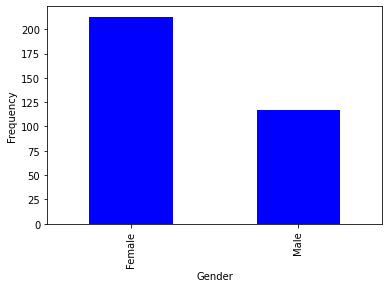

In [171]:
df6.groupby("Gender")["Gender"].count().plot(kind='bar',color='blue')
plt.ylabel("Frequency")
plt.show()

In [172]:
df6.Marital_Status.unique()

array([ 1.,  2., nan])

In [183]:
df6['Marital_Status']=df6['Marital_Status'].apply(lambda x: 'Married' if x==1 else x)
df6['Marital_Status']=df6['Marital_Status'].apply(lambda x: 'Single' if x==2 else x)
#df6['Marital_Status'].isna().sum()
df6.Marital_Status.fillna(df6['Marital_Status'].mode())

0      Married
1       Single
2      Married
3      Married
4      Married
        ...   
325     Single
326    Married
327    Married
328    Married
329     Single
Name: Marital_Status, Length: 330, dtype: object

<AxesSubplot:xlabel='Marital_Status'>

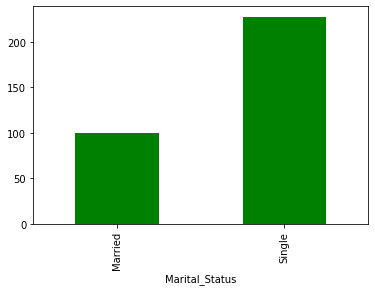

In [188]:
df6.groupby('Marital_Status')['Marital_Status'].count().plot(kind='bar',color='Green')

<h4>5d. In what media outlets should the film series be advertised?

In [189]:
df6.Hear_About.unique()

array(['5', '1', '4', '2', '3', '4,5', '2,5', '1,5', nan, '3,4', '5,4',
       '3,5'], dtype=object)

In [192]:
df6['Hear_New']=df6.Hear_About.map({'1':'television','2':'newspaper','3':'radio','4':'website','5':'word_of_mouth'})

In [193]:
df6.Hear_New

0      word_of_mouth
1      word_of_mouth
2      word_of_mouth
3      word_of_mouth
4         television
           ...      
325       television
326    word_of_mouth
327    word_of_mouth
328            radio
329    word_of_mouth
Name: Hear_New, Length: 330, dtype: object

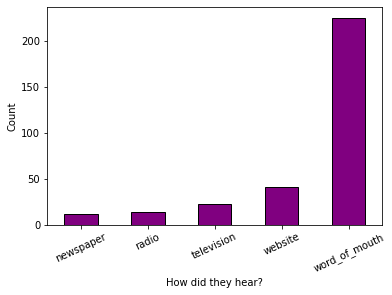

In [194]:
df6.groupby('Hear_New')['Hear_New'].count().plot(kind='bar',color='purple',edgecolor='black')
plt.xticks(rotation=25)
plt.xlabel('How did they hear?')
plt.ylabel('Count')
plt.show()

<h5>The movie news gets spread by "Word of Mouth" in a great scale. But the way of advertisement is through Websites. So its better to concentrate on website advertisement to gain new customers who in-turn can spread by their word of mouth. 